In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
time = np.linspace(0, 1000, 100000)

x = np.exp(1j * 2 * np.pi * 10000 * time)
y = x * np.exp(1j * np.pi)

(0.0, 100.0010000100001)

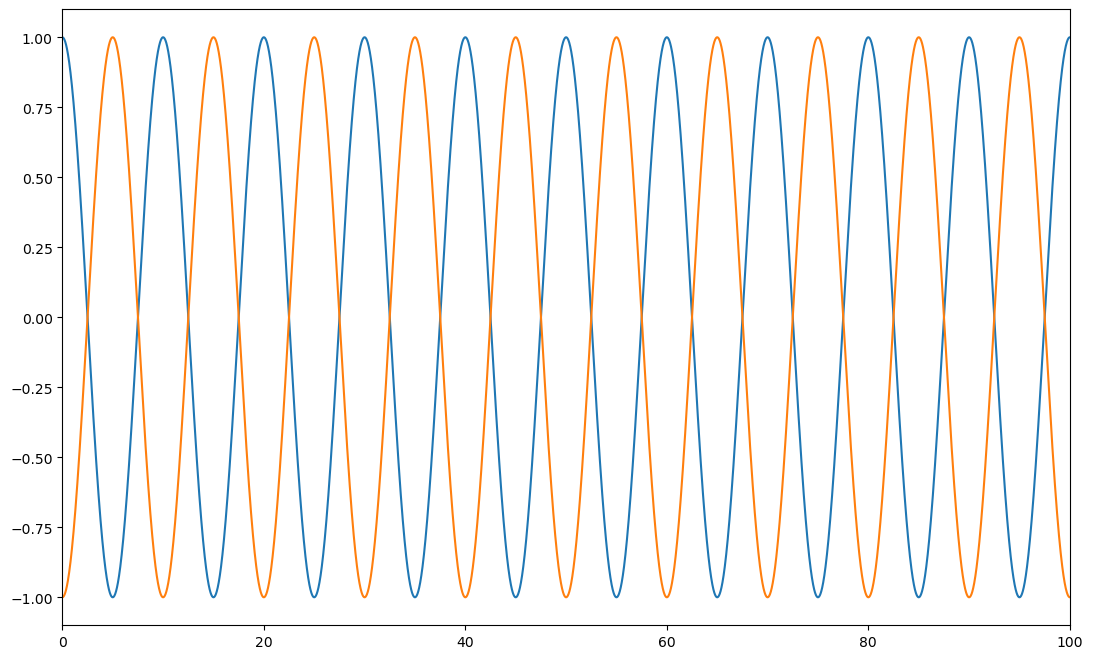

In [3]:

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(time, x.real)
#ax.plot(time, x.imag)

ax.plot(time, y.real)
#ax.plot(time, y.imag)
ax.set_xlim(time[0], time[10000])

In [4]:
abs(np.vdot(x, y)) / time.size

1.0

(0.0, 200.0)

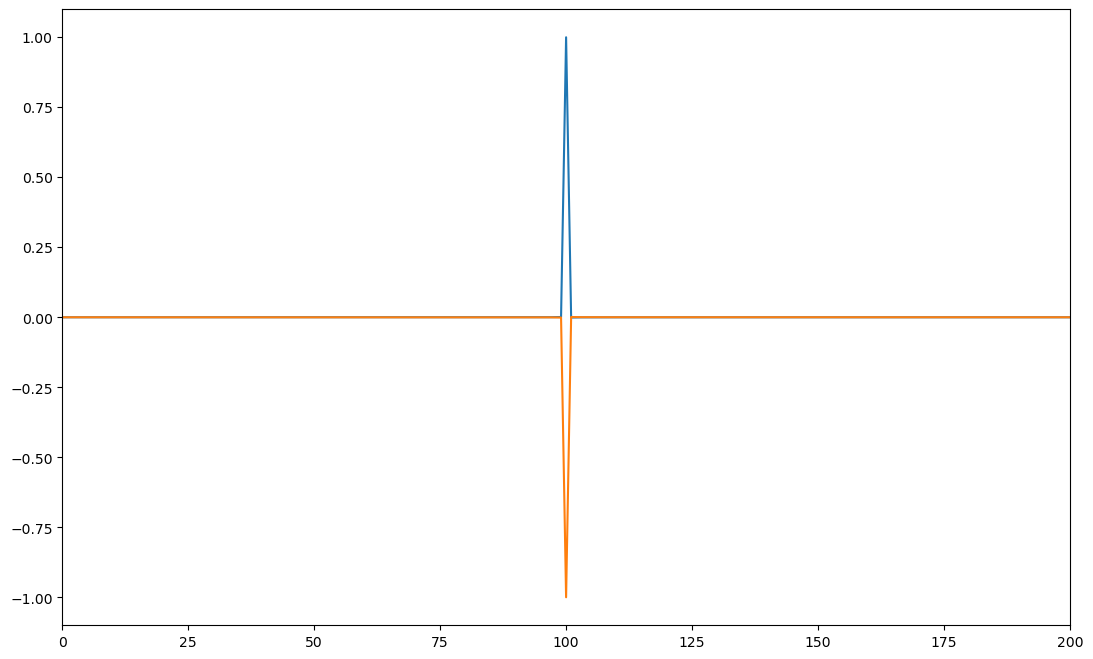

In [5]:

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(np.fft.fft(x, norm='forward').real)
ax.plot(np.fft.fft(y, norm='forward').real)

ax.set_xlim(0, 200)

# convolution theorem

In [105]:
time = np.linspace(0, 1000, 100000)
x = np.zeros(100000, dtype=np.complex128)
rand_freqs = np.random.randint(1, 600, 1000)/12
rand_amp = np.random.rand(1000)
rand_phase = np.random.rand(1000) * 2 * np.pi

for i in range(rand_freqs.size):
    x += rand_amp[i]*np.exp(1j * 2 * np.pi * rand_freqs[i] * time + rand_phase[i])




In [106]:
time = np.linspace(0, 1000, 100000)
y = np.zeros(100000, dtype=np.complex128)
rand_freqs = np.random.randint(1, 600, 1000)/12
rand_amp = np.random.rand(1000)
rand_phase = np.random.rand(1000) * 2 * np.pi

for i in range(rand_freqs.size):
    y += rand_amp[i]*np.exp(1j * 2 * np.pi * rand_freqs[i] * time + rand_phase[i])



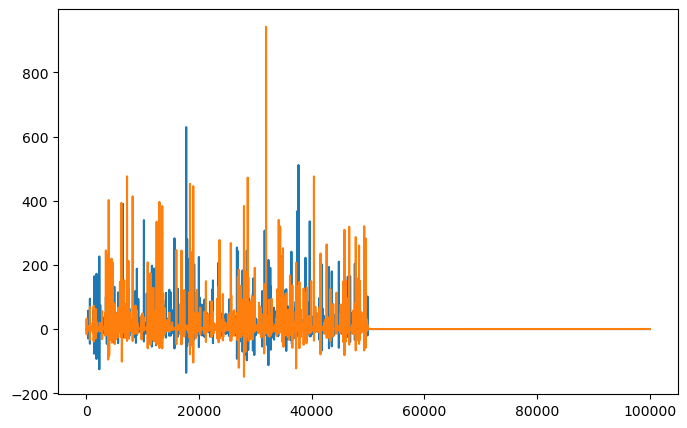

In [107]:

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(np.fft.fft(x, norm='forward').real)
ax.plot(np.fft.fft(y, norm='forward').real)
#ax.plot(np.fft.fft(y, norm='forward').real)

#ax.set_xlim(0, 200)

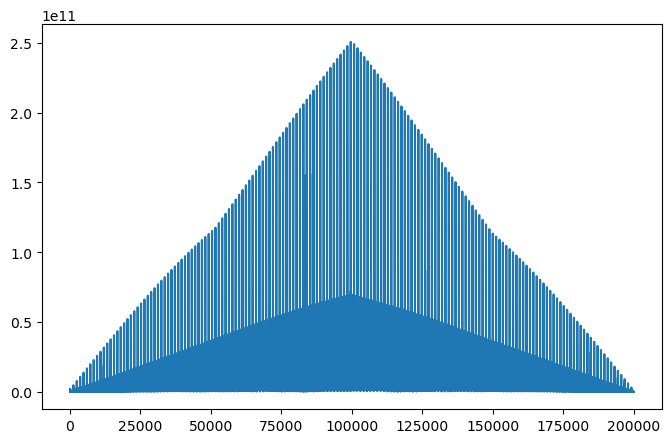

In [108]:

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(signal.convolve(x, y,method='direct')))

250792693806.93234
99599


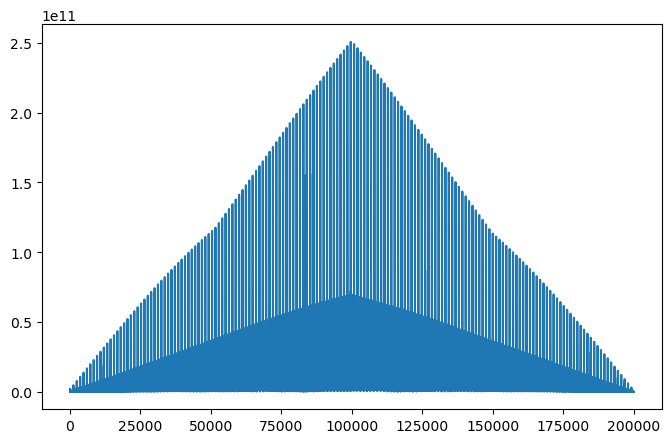

In [130]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
z = abs(signal.convolve(x, y,method='auto', mode='full'))
ax.plot(z)
print(np.max(z)/1)
print(np.argmax(z))

250617755991.08557
99599
[2.17196537e+10 2.24275929e+10 3.28383059e+10 ... 1.96823621e+10
 1.22816082e+10 2.01560690e+10]


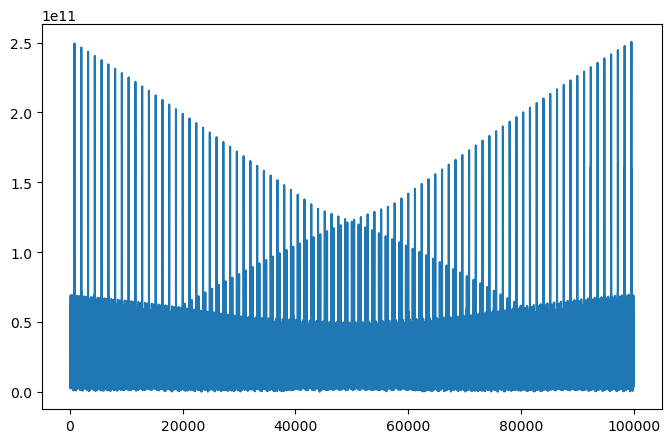

In [135]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
z = abs(np.fft.ifft(np.fft.fft(x) * np.fft.fft(y)))
ax.plot(z)
print(np.max(z)/1)
print(np.argmax(z))
print(z)

251494074027.253
2.51494074027253e+16
255801084465.334


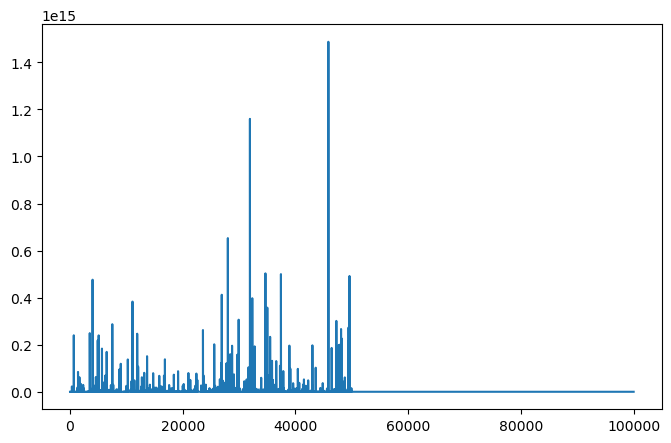

In [134]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
z = abs(np.fft.fft(x).conjugate() * np.fft.fft(y))
ax.plot(z)

dot_prod = np.vdot(np.fft.fft(x, ), np.fft.fft(y,))

print(abs(np.sum(np.fft.fft(x).conjugate()*np.fft.fft(y)))/(1e5))

print(abs(dot_prod)/ (1))
print(np.mean(z))

(200000,)

270678.2765015833


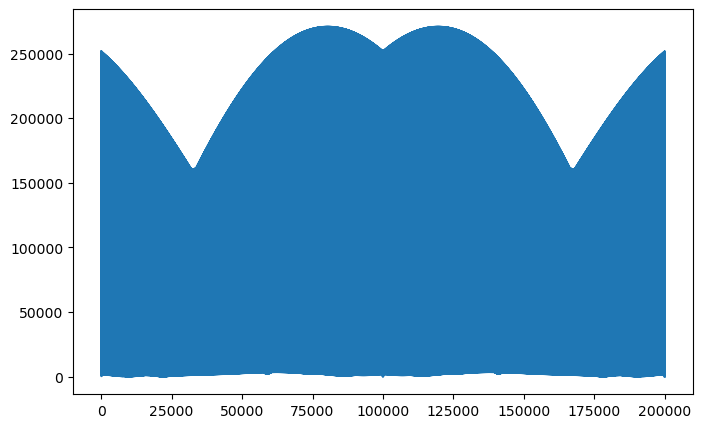

In [67]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(np.fft.ifft(
    np.fft.fft(np.concatenate((x.conjugate(),np.zeros(100000, dtype=np.complex128))))\
    * np.fft.fft(np.concatenate((y, np.zeros(100000, dtype=np.complex128))))
)))
print(abs(np.max(signal.convolve(x.conjugate(), y))))

251681.04029152717
251681.04029154155


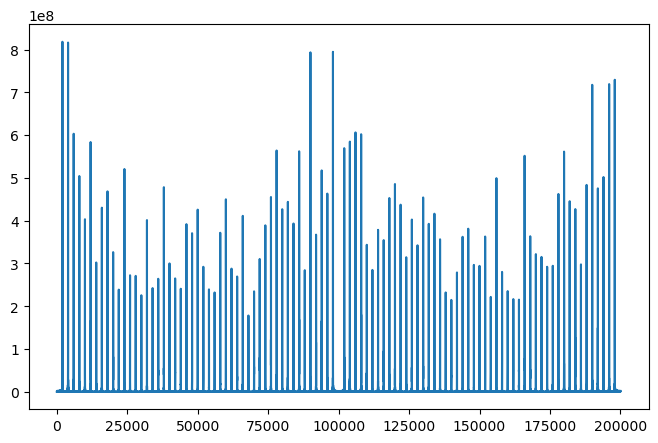

In [71]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(
    np.fft.fft(np.concatenate((x.conjugate(),np.zeros(100000, dtype=np.complex128))), )\
    * np.fft.fft(np.concatenate((y, np.zeros(100000, dtype=np.complex128))),)
))


print(abs(np.vdot(
    np.fft.fft(np.concatenate((x.conjugate(),np.zeros(100000, dtype=np.complex128))), ),
    np.fft.fft(np.concatenate((y, np.zeros(100000, dtype=np.complex128))),)
))/200000)

print(abs(np.vdot(
    np.fft.fft(x.conjugate()),
    np.fft.fft(y,)
))/100000)